In [1]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv -O titanic.csv

--2025-06-23 07:49:09--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.1s    

2025-06-23 07:49:09 (317 KB/s) - ‘titanic.csv’ saved [44225/44225]



In [2]:
import pandas as pd
import numpy as np
file_path = '/content/titanic.csv'
df = pd.read_csv(file_path)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


##Q1. 남성과 여성 중 누가 더 많이 생존했을까?

In [5]:
print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64


####여성의 생존율이 남성에 비해 압도적으로 높다는 것을 확인할 수 있습니다. 이는 당시 '여성과 아이 먼저'라는 구조 원칙이 실제로 적용되었음을 시사합니다.

In [7]:
print(df.groupby('Sex').mean(numeric_only=True))

        Survived    Pclass        Age  Siblings/Spouses Aboard  \
Sex                                                              
female  0.742038  2.159236  27.719745                 0.694268   
male    0.190227  2.385689  30.431361                 0.432810   

        Parents/Children Aboard       Fare  
Sex                                         
female                 0.649682  44.479818  
male                   0.237347  25.633935  


##Q2. 티켓 등급이 생존에 영향을 미쳤을까?

In [9]:
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64


####등급이 낮아질수록 생존율이 낮아지는 것을 확인할 수 있다. 이는 사회 경제적 지위가 생존 가능성과 직결되었음을 알 수 있다.

##Q3. 나이는 생존과 어떤 관련이 있을까?

In [11]:
#n개의 그룹을 나눔(bins = n)
print(df.groupby(pd.cut(df['Age'], bins=5))['Survived'].mean())

Age
(0.34, 16.336]      0.517544
(16.336, 32.252]    0.348786
(32.252, 48.168]    0.408696
(48.168, 64.084]    0.389610
(64.084, 80.0]      0.076923
Name: Survived, dtype: float64


/tmp/ipython-input-11-2225301509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(pd.cut(df['Age'], bins=5))['Survived'].mean())


##데이터 시각화하기

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### 성별에 따른 생존율 시각화

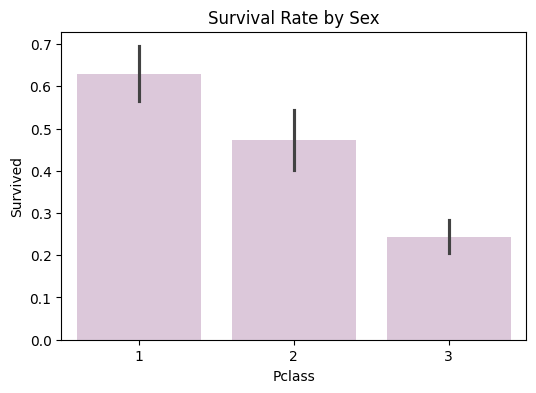

In [21]:
plt.figure(figsize = (6, 4))
sns.barplot(x='Pclass', y='Survived', data = df, color='#dfc5dd')
plt.title('Survival Rate by Sex')
plt.show()

### 객실 등급에 따른 생존율 시각화

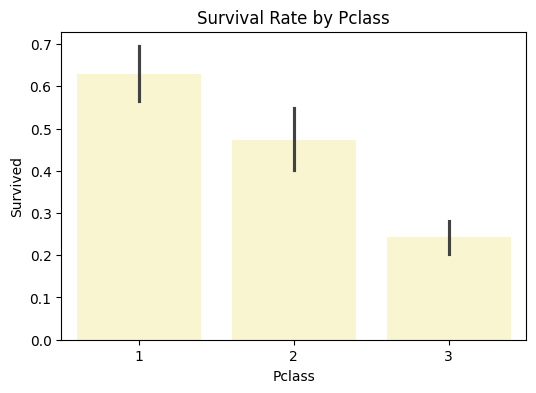

In [36]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, color='#fffbc9')
plt.title('Survival Rate by Pclass')
plt.show()

##핸즈온 시각화

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

###막대 그래프

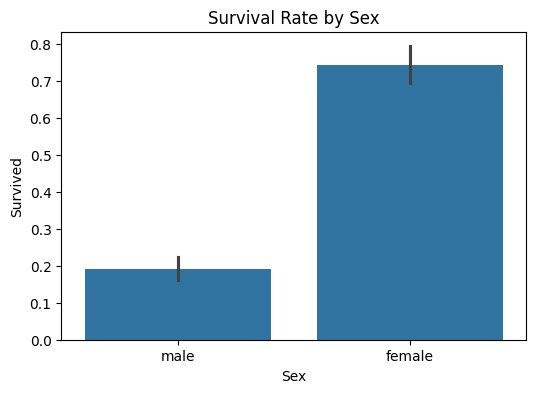

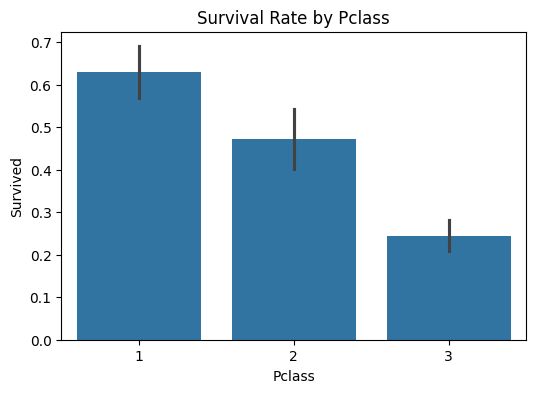

In [26]:
# 성별에 따른 생존율 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# 객실 등급에 따른 생존율 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

###히스토그램

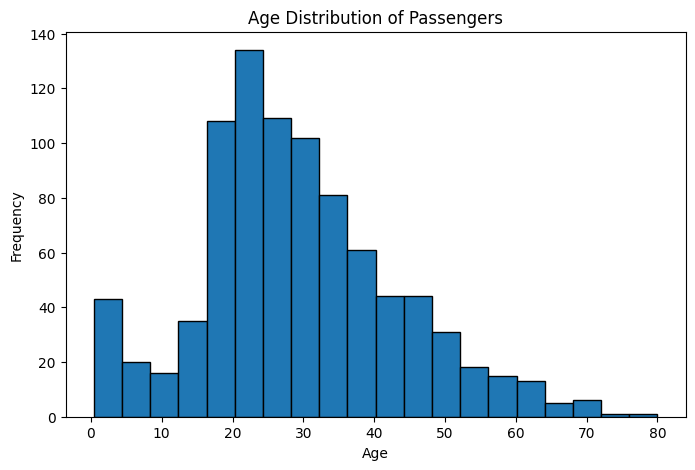

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##Scikit-learn

###데이터 전처리

In [27]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-27-2038335992.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


###feature/target 지정

In [29]:
features = [
    'Pclass',
    'Sex',
    'Age',
    'Siblings/Spouses Aboard',
    'Parents/Children Aboard'
]

X = df[features] #특징
y = df['Survived'] #생존여부

###의사결정나무 모델 훈련 (Decision Tree)

In [32]:
from sklearn.tree import DecisionTreeClassifier

# 모델 초기화
model = DecisionTreeClassifier(random_state=42)

# 모델 훈련 fit()
model.fit(X, y)

print("모델 훈련이 완료되었습니다.")

모델 훈련이 완료되었습니다.


In [33]:
# 예: 3등석, 남성(0), 25세, Siblings/Spouses Aboard=0, Parents/Children Aboard=0
example_passenger = [[3, 0, 25, 0, 0]]  # 정확한 feature 순서에 맞춰 입력

# 예측
prediction = model.predict(example_passenger)
print(f"예측 결과 (0: 사망, 1: 생존): {prediction[0]}")

예측 결과 (0: 사망, 1: 생존): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
